In [16]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import scienceplots
from src.model.compressor import Compressor

plt.style.use(['science', 'bright'])
plt.rcParams['figure.dpi'] = 300

In [17]:
# Modelo
model = Compressor(input_dim=4, hidden_dim=128, output_dim=6)
model.load_state_dict(torch.load("data/processed/compressor_model.pth"))
model.eval()  

C:\Users\Julian\AppData\Local\Temp\ipykernel_14440\1217552715.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("data/processed/compressor

Compressor(
  (encoder): Sequential(
    (0): Linear(in_features=4, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=6, bias=True)
  )
)

In [18]:
for name, param in model.named_parameters():
    print(f"{name}: {param.shape}")

encoder.0.weight: torch.Size([128, 4])
encoder.0.bias: torch.Size([128])
encoder.2.weight: torch.Size([128, 128])
encoder.2.bias: torch.Size([128])
encoder.4.weight: torch.Size([6, 128])
encoder.4.bias: torch.Size([6])


In [19]:
# Datos preprocesados
Cl_normalized = torch.load("data/preprocessed/Cl_normalized.pt")
params = torch.load("data/preprocessed/params.pt")

print("Cl_normalized shape:", Cl_normalized.shape)  # Debería ser (num_sims, num_fields)
print("params shape:", params.shape)              # Debería ser (num_sims, num_params)

Cl_normalized shape: torch.Size([50, 4])
params shape: torch.Size([50, 6])


C:\Users\Julian\AppData\Local\Temp\ipykernel_14440\90619036.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Cl_normalized = torch.load("data/preprocessed/Cl_normalized.p

Predictions shape: torch.Size([50, 6])


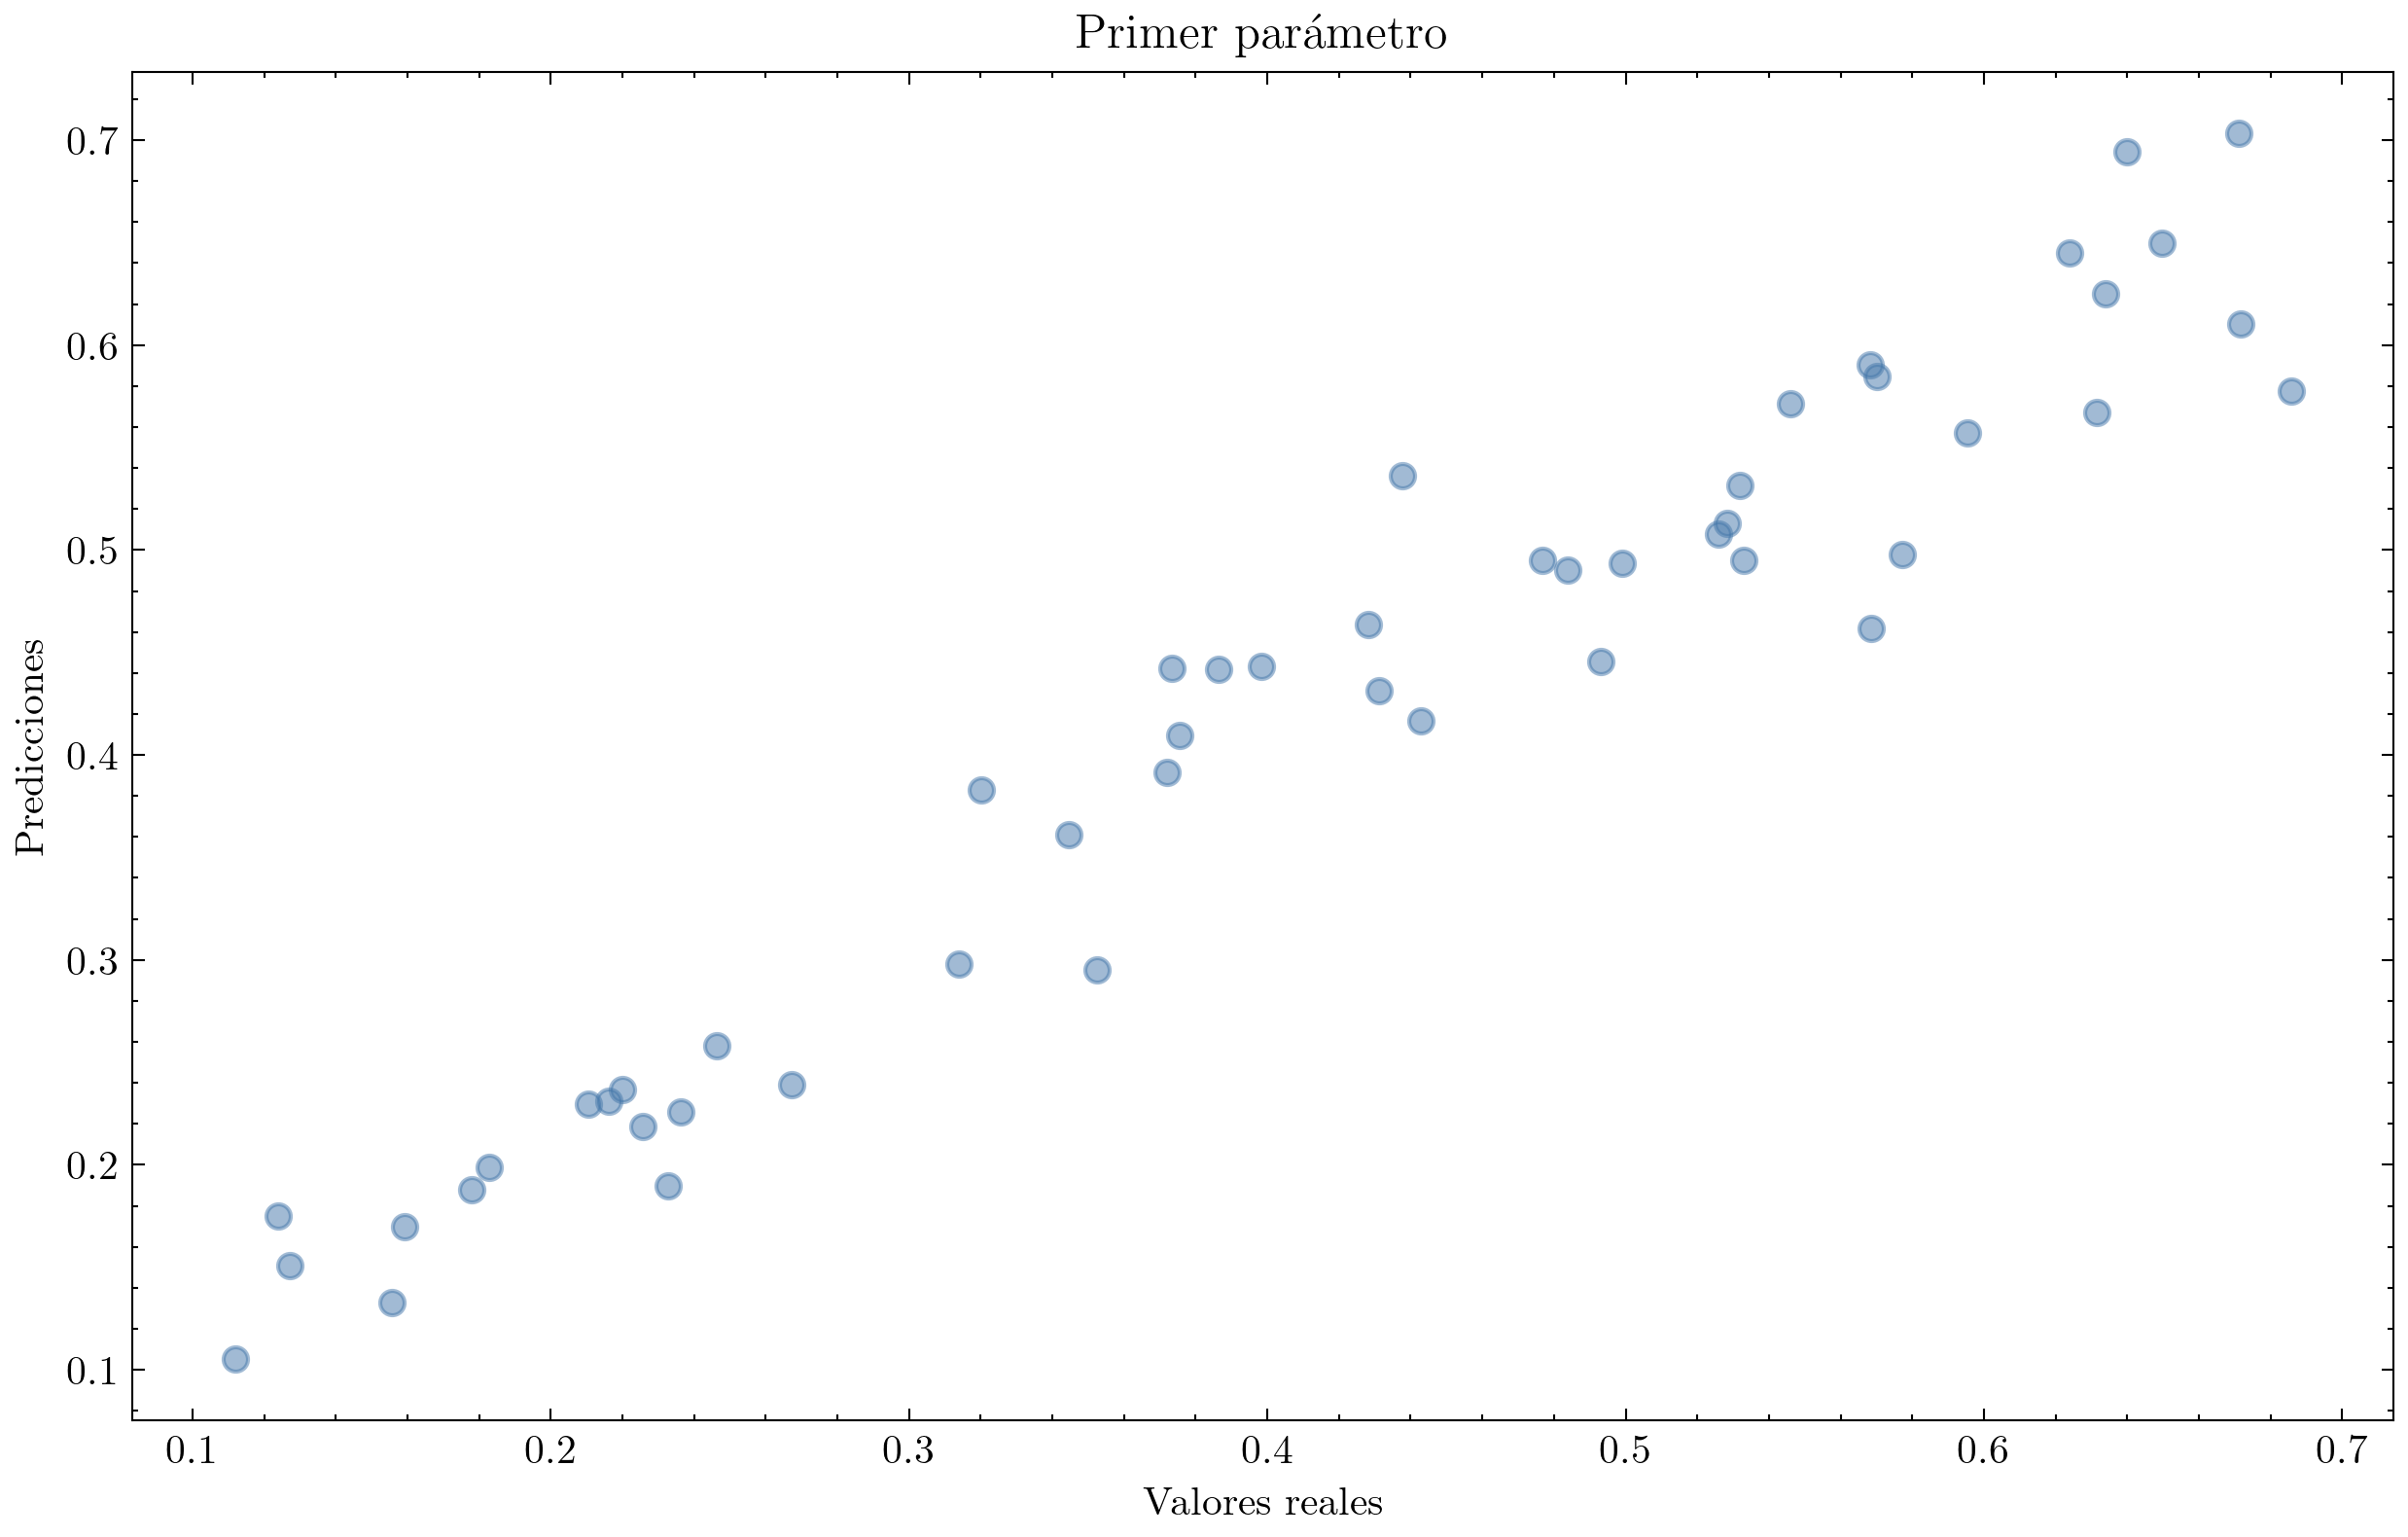

In [20]:
# Realizar predicciones
with torch.no_grad():  
    predictions = model(Cl_normalized)

print("Predictions shape:", predictions.shape)  

plt.figure(figsize=(10, 6))
plt.scatter(params[:, 0], predictions[:, 0], alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Primer parámetro")
plt.show()

In [ ]:
# Faltan test